In [208]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [209]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [210]:
data = pd.read_csv("/content/gdrive/MyDrive/country_vaccinations.csv")

In [211]:
data.head(20)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
5,Albania,ALB,2021-01-15,308.0,308.0,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
6,Albania,ALB,2021-01-16,369.0,369.0,NaN,61.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
7,Albania,ALB,2021-01-17,405.0,405.0,NaN,36.0,58.0,0.01,0.01,NaN,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
8,Albania,ALB,2021-01-18,447.0,447.0,NaN,42.0,55.0,0.02,0.02,NaN,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
9,Albania,ALB,2021-01-19,483.0,483.0,NaN,36.0,51.0,0.02,0.02,NaN,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5321 entries, 0 to 5320
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              5321 non-null   object 
 1   iso_code                             4989 non-null   object 
 2   date                                 5321 non-null   object 
 3   total_vaccinations                   3384 non-null   float64
 4   people_vaccinated                    2990 non-null   float64
 5   people_fully_vaccinated              2039 non-null   float64
 6   daily_vaccinations_raw               2845 non-null   float64
 7   daily_vaccinations                   5137 non-null   float64
 8   total_vaccinations_per_hundred       3384 non-null   float64
 9   people_vaccinated_per_hundred        2990 non-null   float64
 10  people_fully_vaccinated_per_hundred  2039 non-null   float64
 11  daily_vaccinations_per_million

In [213]:
data.isnull().sum()

country                                   0
iso_code                                332
date                                      0
total_vaccinations                     1937
people_vaccinated                      2331
people_fully_vaccinated                3282
daily_vaccinations_raw                 2476
daily_vaccinations                      184
total_vaccinations_per_hundred         1937
people_vaccinated_per_hundred          2331
people_fully_vaccinated_per_hundred    3282
daily_vaccinations_per_million          184
vaccines                                  0
source_name                               6
source_website                            0
dtype: int64

In [214]:
data['iso_code'].fillna(method="ffill", inplace = True)
data['iso_code'].fillna(method="bfill", inplace = True)

In [215]:
data['total_vaccinations'].fillna(method='ffill', inplace = True)
data['total_vaccinations'].fillna(method='bfill', inplace = True)
data['people_vaccinated'].fillna(method='ffill', inplace = True)
data['people_vaccinated'].fillna(method='bfill', inplace = True)
data['people_fully_vaccinated'].fillna(method='ffill', inplace = True)
data['people_fully_vaccinated'].fillna(method='bfill', inplace=True)
data['daily_vaccinations_raw'].fillna(method='ffill', inplace=True)
data['daily_vaccinations_raw'].fillna(method='bfill', inplace=True)
data['daily_vaccinations'].fillna(method='ffill', inplace=True)
data['daily_vaccinations'].fillna(method='bfill', inplace=True)
data['total_vaccinations_per_hundred'].fillna(method='ffill', inplace = True)
data['total_vaccinations_per_hundred'].fillna(method='bfill', inplace= True)
data['people_vaccinated_per_hundred'].fillna(method='ffill', inplace=True)
data['people_vaccinated_per_hundred'].fillna(method='bfill', inplace = True)
data['people_fully_vaccinated_per_hundred'].fillna(method='ffill', inplace=True)
data['people_fully_vaccinated_per_hundred'].fillna(method='bfill', inplace=True)
data['daily_vaccinations_per_million'].fillna(method='ffill', inplace = True)
data['daily_vaccinations_per_million'].fillna(method='bfill', inplace = True)

In [216]:
data.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            6
source_website                         0
dtype: int64

In [217]:
data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,5.321000e+03,5.321000e+03,5.321000e+03,5.321000e+03,5.321000e+03,5321.000000,5321.000000,5321.000000,5321.000000
mean,1.575814e+06,1.270443e+06,7.292340e+05,6.156941e+04,5.732616e+04,6.292246,5.940983,3.298765,2513.096786
std,6.071801e+06,4.298615e+06,3.075647e+06,2.057616e+05,1.838144e+05,12.916980,9.990725,6.126762,4397.481830
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.097200e+04,1.230400e+04,1.344800e+04,2.006000e+03,1.121000e+03,0.270000,0.350000,0.470000,330.000000
50%,8.392800e+04,7.288200e+04,1.046130e+05,1.019100e+04,6.331000e+03,1.900000,2.210000,1.570000,1117.000000
75%,6.449990e+05,6.289930e+05,4.942090e+05,3.608000e+04,2.841500e+04,5.920000,6.090000,2.960000,2550.000000
max,8.791232e+07,5.735885e+07,2.977616e+07,2.904229e+06,2.158020e+06,126.290000,80.570000,45.720000,54264.000000


In [218]:
data.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [219]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,1.0,60.0,64.0,0.00,0.00,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,0.0,0.0,1.0,60.0,64.0,0.00,0.00,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,1.0,60.0,64.0,0.00,0.00,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,1.0,60.0,63.0,0.01,0.01,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,1.0,78.0,66.0,0.01,0.01,0.0,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [220]:
data['country'].unique()

array(['Albania', 'Algeria', 'Andorra', 'Anguilla', 'Argentina',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Estonia', 'Faeroe Islands',
       'Falkland Islands', 'Finland', 'France', 'Germany', 'Gibraltar',
       'Greece', 'Greenland', 'Guatemala', 'Guernsey', 'Guyana',
       'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Ireland', 'Isle of Man', 'Israel', 'Italy',
       'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kuwait', 'Latvia',
       'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao',
       'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Monaco',
       'Mongolia', 'Montenegro'

In [221]:
data=data[data['country'].apply(lambda x: x not in ['England','Wales','Northern Ireland','Scotland'])]

In [222]:
l=[]
for i in range(121):
    l.append(data['country'].value_counts()[i])

In [223]:
fig = px.pie(data, values=l, names=data['country'].value_counts().index)
fig.update_traces(textposition='inside', textfont_size=14)
fig.show()

In [224]:
data['vaccines'].value_counts().unique

<bound method Series.unique of Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          1332
Pfizer/BioNTech                                                                       1073
Moderna, Pfizer/BioNTech                                                               445
Oxford/AstraZeneca, Pfizer/BioNTech                                                    419
Oxford/AstraZeneca                                                                     322
Sputnik V                                                                              257
Sinovac                                                                                136
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                      132
Sinopharm/Beijing                                                                       99
Oxford/AstraZeneca, Sinopharm/Beijing                                                   94
Pfizer/BioNTech, Sinovac                                   

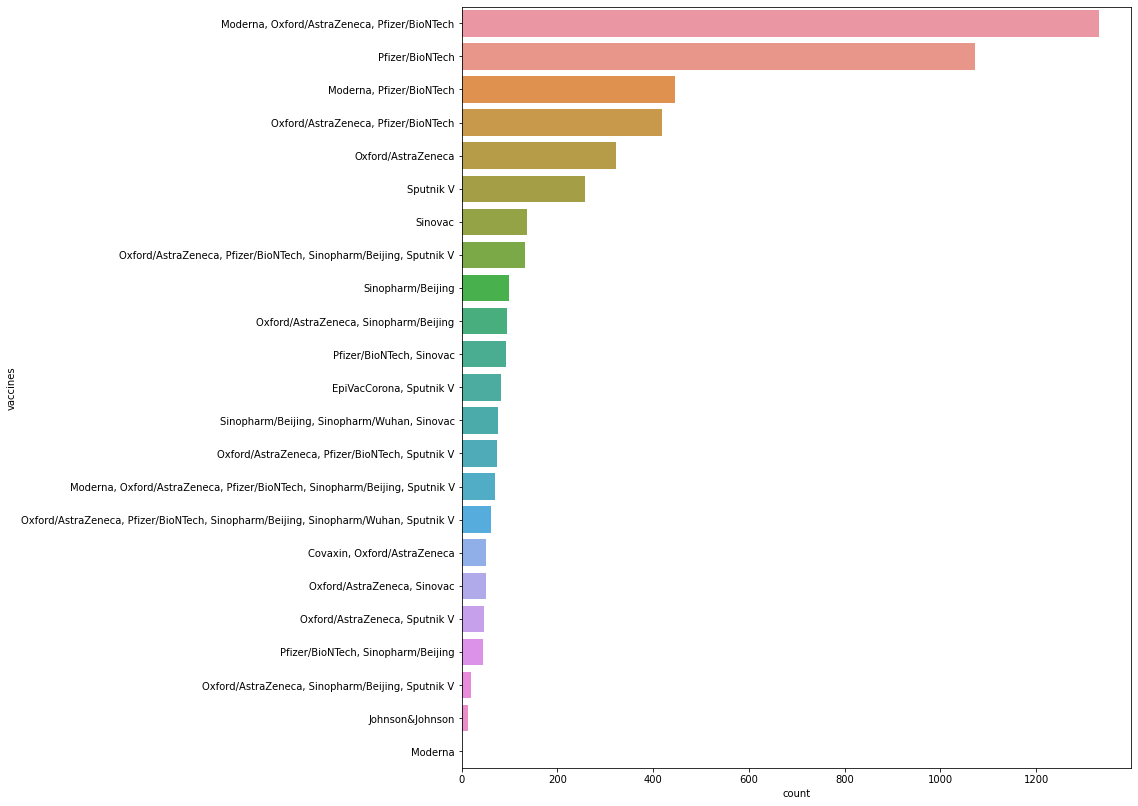

In [225]:
plt.figure(figsize= (12,14))
sns.countplot(y=data['vaccines'], order= data['vaccines'].value_counts().index)
plt.show()

In [226]:
df1 = data[['country', 'iso_code', 'vaccines']]

In [227]:
df1

,country,iso_code,vaccines
0,Albania,ALB,Pfizer/BioNTech
1,Albania,ALB,Pfizer/BioNTech
2,Albania,ALB,Pfizer/BioNTech
3,Albania,ALB,Pfizer/BioNTech
4,Albania,ALB,Pfizer/BioNTech
...,...,...,...
5316,Zimbabwe,ZWE,Sinopharm/Beijing
5317,Zimbabwe,ZWE,Sinopharm/Beijing
5318,Zimbabwe,ZWE,Sinopharm/Beijing
5319,Zimbabwe,ZWE,Sinopharm/Beijing


In [228]:
fig = px.choropleth(df1, locations="iso_code",
                    color="vaccines",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                   title= "Vaccines used by different countries")

fig.update_layout(showlegend=False)
fig.show()

In [229]:
df0 = data[['country', 'vaccines']]

In [230]:
df0 = df0.groupby('vaccines').sum().sort_values('country', ascending = False)

In [231]:
df0 = df0.reset_index()

In [232]:
df0

,vaccines,country
0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",United Arab EmiratesUnited Arab EmiratesUnited...
1,Johnson&Johnson,South AfricaSouth AfricaSouth AfricaSouth Afri...
2,"EpiVacCorona, Sputnik V",RussiaRussiaRussiaRussiaRussiaRussiaRussiaRuss...
3,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",PakistanPakistanPakistanPakistanPakistanPakist...
4,"Oxford/AstraZeneca, Sinopharm/Beijing",MoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoro...
5,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",MexicoMexicoMexicoMexicoMexicoMexicoMexicoMexi...
6,"Pfizer/BioNTech, Sinopharm/Beijing",JordanJordanJordanJordanJordanJordanJordanJord...
7,"Oxford/AstraZeneca, Pfizer/BioNTech",Isle of ManIsle of ManIsle of ManIsle of ManIs...
8,"Covaxin, Oxford/AstraZeneca",IndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaI...
9,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",HungaryHungaryHungaryHungaryHungaryHungaryHung...


In [233]:
data.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,1.0,60.0,64.0,0.00,0.00,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,0.0,0.0,1.0,60.0,64.0,0.00,0.00,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,1.0,60.0,64.0,0.00,0.00,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,1.0,60.0,63.0,0.01,0.01,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,1.0,78.0,66.0,0.01,0.01,0.0,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
5,Albania,ALB,2021-01-15,308.0,308.0,1.0,42.0,62.0,0.01,0.01,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
6,Albania,ALB,2021-01-16,369.0,369.0,1.0,61.0,62.0,0.01,0.01,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
7,Albania,ALB,2021-01-17,405.0,405.0,1.0,36.0,58.0,0.01,0.01,0.0,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
8,Albania,ALB,2021-01-18,447.0,447.0,1.0,42.0,55.0,0.02,0.02,0.0,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
9,Albania,ALB,2021-01-19,483.0,483.0,1.0,36.0,51.0,0.02,0.02,0.0,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [234]:
data.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            6
source_website                         0
dtype: int64

In [235]:
df2 = data[['country', 'daily_vaccinations']]

In [236]:
df2a = df2.groupby('country').sum().sort_values('daily_vaccinations', ascending = False)

In [237]:
df2a = df2a.reset_index()

In [238]:
df2a

,country,daily_vaccinations
0,United States,81166580.0
1,China,49866037.0
2,United Kingdom,21933874.0
3,India,17591606.0
4,Turkey,10008038.0
...,...,...
116,Trinidad and Tobago,2862.0
117,Falkland Islands,2358.0
118,Guyana,2131.0
119,Montserrat,782.0


In [239]:
fig = px.bar(df2a.head(10), y = 'daily_vaccinations', color ='daily_vaccinations', x = 'country', title = 'Country vs Total Daily Vaccinations')
fig.show()

In [240]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = df2a['country'],
    z = df2a['daily_vaccinations'],
    text = df2a['daily_vaccinations'],
   # colorscale=colors,
    autocolorscale=True,
    reversescale=False,
    colorbar_title = 'Total of daily vaccinations',
))

fig.update_layout(
    title_text='Total of daily vaccinations by each country',
    geo=dict(
        showcoastlines=True,
    ),
)

In [241]:
!pip install requests

In [242]:
import requests
URL=requests.get('https://www.worldometers.info/world-population/population-by-country/')

In [243]:
URL.status_code

200

In [244]:

from bs4 import BeautifulSoup

content=BeautifulSoup(URL.text,'html.parser')

In [245]:
table=content.find('table',class_="table table-striped table-bordered")

In [246]:
for i in table.find_all('tbody'):
    rows=i.find_all('tr')
    l1=[]
    l2=[]
    l3=[]
    for j in rows:
        #print(j)
        l1.append(j.find('td').text)
        l2.append(j.find('a').text)
        l3.append(j.find('td',style="font-weight: bold;").text)


In [247]:
population_df=pd.DataFrame({'Country':l2,'Population':l3})

In [248]:
population_df['Country'].shape

(235,)

In [249]:
l=[]
for i in range(121):
    l.append(population_df[population_df['Country']==df2a['country'][i]].values)

In [250]:
for i in range(len(l)):
    if l[i].shape[0]==0:
        to_fill=np.array([[np.nan],[0]])
        arr=l[i]
        l[i]=np.append(arr,to_fill).reshape(1,2)

In [251]:
sl=[]
for i in range(len(l)):
    sl.append(str(l[i][0][1]))

In [252]:
df2a=df2a.assign(population=sl)

In [253]:
df2a

,country,daily_vaccinations,population
0,United States,81166580.0,"331,002,651"
1,China,49866037.0,"1,439,323,776"
2,United Kingdom,21933874.0,"67,886,011"
3,India,17591606.0,"1,380,004,385"
4,Turkey,10008038.0,"84,339,067"
...,...,...,...
116,Trinidad and Tobago,2862.0,"1,399,488"
117,Falkland Islands,2358.0,"3,480"
118,Guyana,2131.0,"786,552"
119,Montserrat,782.0,"4,992"


In [254]:
missing_countries_pop=[]
for i in range(df2a.shape[0]):
    if df2a.loc[i][2]=='0.0':
        missing_countries_pop.append(df2a.loc[i][0])

In [255]:
missing_countries_pop

['Czechia',
 'Turks and Caicos Islands',
 'Jersey',
 'Guernsey',
 'Northern Cyprus']

In [256]:

miss_con_pop=['10,600,000','97,857','1,207,359','63,155','44,543']

In [257]:
d=dict(zip(df2a['country'],df2a['population']))


In [258]:
j =0
for i in d:
    if d[i]=='0.0':
        d[i]=miss_con_pop[j]
        j+=1

In [259]:
df2a['population']=df2a['country'].map(d)


In [260]:
df2a['daily_vaccinations']=df2a[['daily_vaccinations']].astype(int)

In [261]:
la=[]
for i in range(df2a.shape[0]):
    la.append(int(float(df2a['population'][i].replace(',',''))))

In [262]:
df2b=df2a.drop('population',axis=1)

In [263]:
df2b=df2b.assign(population=la)

In [264]:
df2b

,country,daily_vaccinations,population
0,United States,81166580,331002651
1,China,49866037,1439323776
2,United Kingdom,21933874,67886011
3,India,17591606,1380004385
4,Turkey,10008038,84339067
...,...,...,...
116,Trinidad and Tobago,2862,1399488
117,Falkland Islands,2358,3480
118,Guyana,2131,786552
119,Montserrat,782,4992


In [265]:
def per_vacc(data_frame1):
    x=[]
    for i in range(data_frame1.shape[0]):
        x.append(data_frame1.iloc[i][1]*100/int(data_frame1.iloc[i][2]))
    new_x=np.round(x,decimals=3)
    return new_x


In [266]:
per=per_vacc(df2b)

In [267]:
df2b=df2b.assign(percentage=per)

In [268]:
fig = px.bar(df2b.head(10), y='percentage',color='percentage',x='country',hover_data=['population','daily_vaccinations'],
             title='Top 10 countries with vaccinations by population ratio',
            labels={'daily_vaccinations':'Total vaccinations'})
fig.show()

In [269]:
!pip install pyspark

In [270]:
from pyspark.sql.functions import col
from pyspark.sql.functions import *

In [271]:
for col in df2b.columns:
  df2b[col] = df2b[col].astype(str)
df2b['text'] =df2b['country'] + '<br>' + \
            ' Total vaccinations '  + df2b['daily_vaccinations'] + '<br>' + \
            ' Population ' + df2b['population']
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = df2b['country'],
    z =df2b['percentage'],
    text=df2b['text'],
    colorscale='Reds',
    autocolorscale=True,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'percentage',
))
fig.update_layout(
    title_text='Vaccinations by Population ratio distribution of each country.',
    geo=dict(
        showcoastlines=True
    )
)